In [1]:
import os
os.listdir()

['test_compdoc_vg_comp.ecr',
 'glasses_rndpng.ecr',
 'Test GoodSymCrypt.ipynb',
 '.ipynb_checkpoints',
 'Encrypt test document.odt',
 'test_rnd_png_short.png',
 'encryptutil.py',
 '__pycache__',
 'pngutil.py',
 "Colin's new glasses.jpg",
 'test_compdoc_rpng.ecr',
 'decryptutil.py~',
 'test_rnd_png.png',
 'test_vg.ecr',
 'test.ecr',
 '.git',
 '2015_visitorsguide_web.pdf',
 '2015_visitorsguide_web.pdf.tar.gz',
 'encryptutil.py~',
 'decryptutil.py',
 'Encrypt test document.odt.tar.gz',
 'test_rndpng.ecr',
 'tests',
 'test_vg_comp.ecr',
 'rndpngshort_rndpng.ecr']

In [2]:
from encryptutil import *
from decryptutil import *
dir()

['In',
 'Out',
 '_',
 '_1',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'array',
 'decryptbytechunk',
 'decryptfile',
 'decryptheader',
 'decryptheaderbytechunk',
 'encryptbytechunk',
 'encryptfile',
 'exit',
 'get_ipython',
 'headerbytes',
 'keylist',
 'math',
 'os',
 'quit',
 'random',
 'time']

In [3]:
toencrypt=open('tests/Encrypt test document.odt','rb')
print(toencrypt.name)

tests/Encrypt test document.odt


In [4]:
keyfile=open('test_rnd_png.png','rb')
print(keyfile.name)

test_rnd_png.png


In [5]:
encrypted = encryptfile(toencrypt,'Encrypt test document.odt',keyfile)
filename = encrypted.name
encrypted.close()
print('Encryption complete. Naming file to "test.ecr".')
os.rename(filename,'test.ecr')
print('Done.')

Generating 65535 bytes of encryption data...
Writing 92 bytes of encrypted file header...
Encrypting file...
Size of chunk to encrypt: 33938
Encryption complete. Naming file to "test.ecr".
Done.


In [6]:
todecrypt = open('test.ecr','rb')
decryptfile(todecrypt, keyfile)

Decrypting header info...
Decrypting file into 'Encrypt test document.odt'...


'Decryption complete.'

In [7]:
os.path.realpath(todecrypt.name)

'/home/jonathan/git/GoodSymCrypt/test.ecr'

In [8]:
keyfile=open('2015_visitorsguide_web.pdf','rb')
print('Keyfile: '+ os.path.realpath(keyfile.name))
encrypted = encryptfile(toencrypt,'Encrypt test document.odt',keyfile)
filename = encrypted.name
encrypted.close()
print('Encryption complete. Naming file to "test.ecr".')
os.rename(filename,'test.ecr')
print('Done.')

Keyfile: /home/jonathan/git/GoodSymCrypt/2015_visitorsguide_web.pdf
Generating 65535 bytes of encryption data...
Writing 92 bytes of encrypted file header...
Encrypting file...
Size of chunk to encrypt: 33938
Encryption complete. Naming file to "test.ecr".
Done.


In [9]:
keyfile=open('2015_visitorsguide_web.pdf.tar.gz','rb')
print('Keyfile: '+ os.path.realpath(keyfile.name))
encrypted = encryptfile(toencrypt,'Encrypt test document.odt',keyfile)
filename = encrypted.name
encrypted.close()
savename='test_vg_comp.ecr'
print('Encryption complete. Naming file to "'+savename+'".')
os.rename(filename,savename)
print('Done.')
todecrypt = open(savename,'rb')
decryptfile(todecrypt, keyfile)

Keyfile: /home/jonathan/git/GoodSymCrypt/2015_visitorsguide_web.pdf.tar.gz
Generating 65535 bytes of encryption data...
Writing 92 bytes of encrypted file header...
Encrypting file...
Size of chunk to encrypt: 33938
Encryption complete. Naming file to "test_vg_comp.ecr".
Done.
Decrypting header info...
Decrypting file into 'Encrypt test document.odt'...


'Decryption complete.'

In [10]:
toencrypt=open('Encrypt test document.odt.tar.gz','rb')
keyfile=open('2015_visitorsguide_web.pdf.tar.gz','rb')
print('Keyfile: '+ os.path.realpath(keyfile.name))
encrypted = encryptfile(toencrypt,'Encrypt test document.odt.tar.gz',keyfile)
filename = encrypted.name
encrypted.close()
savename='test_compdoc_vg_comp.ecr'
print('Encryption complete. Naming file to "'+savename+'".')
os.rename(filename,savename)
print('Done.')
todecrypt = open(savename,'rb')
decryptfile(todecrypt, keyfile)

Keyfile: /home/jonathan/git/GoodSymCrypt/2015_visitorsguide_web.pdf.tar.gz
Generating 65535 bytes of encryption data...
Writing 106 bytes of encrypted file header...
Encrypting file...
Size of chunk to encrypt: 32092
Encryption complete. Naming file to "test_compdoc_vg_comp.ecr".
Done.
Decrypting header info...
Decrypting file into 'Encrypt test document.odt.tar.gz'...


'Decryption complete.'

min(minimum):0
max(minimum):20044
min(maximum):60507
max(maximum):65534
min(length):29
max(length):2341


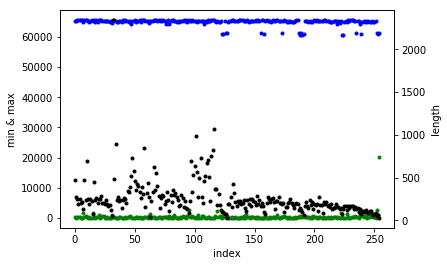

In [11]:
#key statistics plot
import matplotlib.pyplot as plt
keyfile=open('/home/jonathan/git/GoodSymCrypt/2015_visitorsguide_web.pdf','rb')
testkeys = keylist(keyfile,offset=65789,nbytes=65535,chunksize=65535)
length=[]
minimum=[]
maximum=[]
for i in range(0,255):
    length.append(len(testkeys[i]))
    minimum.append(min(testkeys[i]))
    maximum.append(max(testkeys[i]))
minmin=min(minimum)
print('min(minimum):'+str(minmin))
maxmin=max(minimum)
print('max(minimum):'+str(maxmin))
minmax=min(maximum)
print('min(maximum):'+str(minmax))
maxmax=max(maximum)
print('max(maximum):'+str(maxmax))
minlen=min(length)
print('min(length):'+str(minlen))
maxlen=max(length)
print('max(length):'+str(maxlen))

#set up plot
fig, ax1 = plt.subplots()
ax1.plot(minimum,'g.')
ax1.plot(maximum,'b.')
ax1.set_xlabel('index')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('min & max')
ax2 = ax1.twinx()
ax2.plot(length,'k.')
ax2.set_ylabel('length',color='k')
#fig.tight_layout() This command seems to make the plot show up in steps.
plt.show()

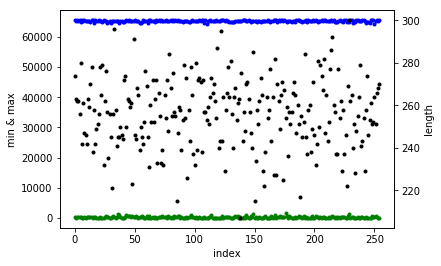

In [12]:
#key statistics plot
import matplotlib.pyplot as plt
keyfile=open('/home/jonathan/git/GoodSymCrypt/test_rnd_png.png','rb')
testkeys = keylist(keyfile,offset=65789,nbytes=65535,chunksize=65535)
length=[]
minimum=[]
maximum=[]
for i in range(0,255):
    length.append(len(testkeys[i]))
    minimum.append(min(testkeys[i]))
    maximum.append(max(testkeys[i]))
minmin=min(minimum)
maxmin=max(minimum)
minmax=min(maximum)
maxmax=max(maximum)
minlen=min(length)
maxlen=max(length)

#set up plot
fig, ax1 = plt.subplots()
ax1.plot(minimum,'g.')
ax1.plot(maximum,'b.')
ax1.set_xlabel('index')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('min & max')
ax2 = ax1.twinx()
ax2.plot(length,'k.')
ax2.set_ylabel('length',color='k')
#fig.tight_layout() This command seems to make the plot show up in steps.
plt.show()

In [13]:
toencrypt=open('Encrypt test document.odt.tar.gz','rb')
keyfile=open('test_rnd_png.png','rb')
print('Keyfile: '+ os.path.realpath(keyfile.name))
encrypted = encryptfile(toencrypt,'Encrypt test document.odt.tar.gz',keyfile)
filename = encrypted.name
encrypted.close()
savename='test_compdoc_rpng.ecr'
print('Encryption complete. Naming file to "'+savename+'".')
os.rename(filename,savename)
print('Done.')
todecrypt = open(savename,'rb')
decryptfile(todecrypt, keyfile)

Keyfile: /home/jonathan/git/GoodSymCrypt/test_rnd_png.png
Generating 65535 bytes of encryption data...
Writing 106 bytes of encrypted file header...
Encrypting file...
Size of chunk to encrypt: 32092
Encryption complete. Naming file to "test_compdoc_rpng.ecr".
Done.
Decrypting header info...
Decrypting file into 'Encrypt test document.odt.tar.gz'...


'Decryption complete.'

In [14]:
toencrypt=open('/home/jonathan/git/GoodSymCrypt/test_rnd_png_short.png','rb')
keyfile=open('test_rnd_png.png','rb')
print('Keyfile: '+ os.path.realpath(keyfile.name))
encrypted = encryptfile(toencrypt,'test_rnd_png_short.png',keyfile)
filename = encrypted.name
encrypted.close()
savename='rndpngshort_rndpng.ecr'
print('Encryption complete. Naming file to "'+savename+'".')
os.rename(filename,savename)
print('Done.')
todecrypt = open(savename,'rb')
decryptfile(todecrypt, keyfile)

Keyfile: /home/jonathan/git/GoodSymCrypt/test_rnd_png.png
Generating 65535 bytes of encryption data...
Writing 86 bytes of encrypted file header...
Encrypting file...
Size of chunk to encrypt: 14468
Encryption complete. Naming file to "rndpngshort_rndpng.ecr".
Done.
Decrypting header info...
Decrypting file into 'test_rnd_png_short.png'...


'Decryption complete.'

In [15]:
toencrypt=open("/home/jonathan/Pictures/Colin's new glasses.jpg",'rb')
keyfile=open('test_rnd_png.png','rb')
print('Keyfile: '+ os.path.realpath(keyfile.name))
encrypted = encryptfile(toencrypt,"Colin's new glasses.jpg",keyfile)
filename = encrypted.name
encrypted.close()
savename='glasses_rndpng.ecr'
print('Encryption complete. Naming file to "'+savename+'".')
os.rename(filename,savename)
print('Done.')
todecrypt = open(savename,'rb')
decryptfile(todecrypt, keyfile)

Keyfile: /home/jonathan/git/GoodSymCrypt/test_rnd_png.png
Generating 65536 bytes of encryption data...
Writing 90 bytes of encrypted file header...
Encrypting file...
Size of chunk to encrypt: 65535
Size of chunk to encrypt: 65535
Size of chunk to encrypt: 65535
Size of chunk to encrypt: 65535
Size of chunk to encrypt: 65535
Size of chunk to encrypt: 65535
Size of chunk to encrypt: 65535
Size of chunk to encrypt: 52472
Encryption complete. Naming file to "glasses_rndpng.ecr".
Done.
Decrypting header info...
Decrypting file into 'Colin's new glasses.jpg'...


'Decryption complete.'

180
